In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
caption_eval_app_data_file = 'allresponses.json'
with open(caption_eval_app_data_file) as f:
    caption_eval_data = json.load(f)

In [3]:
count_human = 0
for thing in caption_eval_data:
    if 'Z2' in thing:
        count_human += 1

total_rated = len(caption_eval_data)
print(total_rated)
print(count_human)
print(caption_eval_data[1089])
print(caption_eval_data[4036])

12039
10631
{'Image': 'http://images.cocodataset.org/val2014/COCO_val2014_000000056344.jpg', 'Caption': 'a computer screen is shown with a tv and a computer .', 'CapID': 7773, 'Consensus': '3.0000', 'Z0': 3, 'Z1': 3}
{'Image': 'http://images.cocodataset.org/val2014/COCO_val2014_000000026323.jpg', 'Caption': 'A herd of giraffe walking across a grass covered field.', 'CapID': 27790, 'Consensus': '5.0000'}


In [4]:
cosine_sim_ratings = []
human_ratings = []

no_human = 0
for obj in caption_eval_data:
    if 'Z0' in obj:
        cosine_rating = obj['Z0']
    elif 'Z1' in obj:
        cosine_rating = obj['Z1']
    else:
        cosine_rating = obj['Consensus']
    cosine_sim_ratings.append(cosine_rating)
    total_human_ratings = 0
    human_sum = 0
    z_val = 2
    while True:
        key = 'Z'+str(z_val)
        if key in obj:
            total_human_ratings += 1
            human_sum += int(obj[key])
            z_val += 1
        else:
            if z_val == 2:
                no_human += 1
            break
    
    if total_human_ratings > 0:
        human_average = human_sum / total_human_ratings
    else:
        human_average = -1
    
    human_ratings.append(human_average)

In [5]:
print(len(cosine_sim_ratings))
print(len(human_ratings))
print(human_ratings.count(-1))
print(no_human)

12039
12039
1408
1408


In [6]:
count_of_no_cosine = 0
for idx, rat in enumerate(cosine_sim_ratings):
    if rat == -1:
        print(idx)
        count_of_no_cosine += 1
        
print('Number of samples without cosine similarity data = ', count_of_no_cosine)

count_of_no_human = 0
for rat in human_ratings:
    if rat == -1:
        count_of_no_human += 1
        
print('Number of samples without human data = ', count_of_no_human)

Number of samples without cosine similarity data =  0
Number of samples without human data =  1408


In [8]:
# Totals_by_rating means the total number of times
# Need confusion matrix? Can do if we assume human to be ground truth
# This is tricky because we did not use cosine similarity for known 1s (mismatched)
# Unclear which "totals" to take. The cosine similarity totals? or the human totals? 
totals_by_rating = [0, 0, 0, 0, 0, 0]
correct_by_rating = [0, 0, 0, 0, 0, 0]

total_with_cos_and_human = 0
total_correct = 0
for idx, (human, cos) in enumerate(zip(human_ratings, cosine_sim_ratings)):
    if human == -1 or cos == -1:
        continue
    if round(human) == int(cos):
        total_correct += 1
        correct_by_rating[int(cos)] += 1
    
    total_with_cos_and_human += 1
    #totals_by_rating[int(cos)] += 1
    totals_by_rating[round(human)] += 1
        
accuracy = total_correct / total_with_cos_and_human

print('Total with both cosine similarity and human ratings = ', total_with_cos_and_human)
print('Total exact match = ', total_correct)
print('Accuracy = ', accuracy)
print('---------------------------')
print('Totals by rating sum = ', sum(totals_by_rating))
print('Totals by rating = ', totals_by_rating)
print('Correct by rating = ', correct_by_rating)
print('Accuracy by rating 1 - 5')
for idx, (correct, total) in enumerate(zip(correct_by_rating, totals_by_rating)):
    if idx == 0:
        continue
    print('Rating = ', idx, '| Accuracy = ', correct/total)

Total with both cosine similarity and human ratings =  10631
Total exact match =  5271
Accuracy =  0.4958141284921456
---------------------------
Totals by rating sum =  10631
Totals by rating =  [0, 2316, 1895, 1335, 3656, 1429]
Correct by rating =  [0, 1761, 632, 482, 1721, 675]
Accuracy by rating 1 - 5
Rating =  1 | Accuracy =  0.7603626943005182
Rating =  2 | Accuracy =  0.33350923482849604
Rating =  3 | Accuracy =  0.3610486891385768
Rating =  4 | Accuracy =  0.47073304157549234
Rating =  5 | Accuracy =  0.4723582925122463


In [35]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Getting the distribution of the original ratings from cosine similarity

In [24]:
def get_human_rating(game_data_object):
    human_ratings = []
    idx = 2
    while True:
        if 'Z'+str(idx) in game_data_object:
            human_ratings.append(game_data_object['Z'+str(idx)])
        else:
            break
        idx += 1
    print(len(human_ratings))
    human_average = statistics.mean(human_ratings)
    return round(human_average)

In [25]:
sample_obj = {'Z0': 1, 'Z1': 1, 'Z2': 2, 'Z3': 3, 'Z4': 3}

print(get_human_rating(sample_obj))

3
3


In [33]:
five_or_more_human_ratings = []
four_or_more_human_ratings = []
three_or_more_human_ratings = []
two_or_more_human_ratings = []
one_or_more_human_ratings = []
for game_data in caption_eval_data:
    if 'Z6' in game_data:
        five_or_more_human_ratings.append(game_data)
    if 'Z5' in game_data:
        four_or_more_human_ratings.append(game_data)
    if 'Z4' in game_data:
        three_or_more_human_ratings.append(game_data)
    if 'Z3' in game_data:
        two_or_more_human_ratings.append(game_data)
    if 'Z2' in game_data:
        one_or_more_human_ratings.append(game_data)

print(len(five_or_more_human_ratings))
print(len(four_or_more_human_ratings))
print(len(three_or_more_human_ratings))
print(len(two_or_more_human_ratings))
print(len(one_or_more_human_ratings))

#with open('three_or_more_human_ratings.json', 'w') as f:
 #   json.dump(three_or_more_human_ratings, f)
    
with open('two_or_more_human_ratings.json', 'w') as f:
    json.dump(two_or_more_human_ratings, f)

730
1409
4292
8565
10631


In [12]:
vsepp_ratings = []
human_ratings = []
consensus = []
for game_data in caption_eval_data:
    if 'Z2' in game_data:
        vsepp_ratings.append(int(game_data['Z0']))
        human_ratings.append(get_human_rating(game_data))
        consensus.append(round(float(game_data['Consensus'])))

In [13]:
print(len(vsepp_ratings))
print(len(human_ratings))
print(len(consensus))

10631
10631
10631


In [14]:
print('VSEPP Derived Ratings')
print('Count 1 = ', vsepp_ratings.count(1))
print('Count 2 = ', vsepp_ratings.count(2))
print('Count 3 = ', vsepp_ratings.count(3))
print('Count 4 = ', vsepp_ratings.count(4))
print('Count 5 = ', vsepp_ratings.count(5))
total = vsepp_ratings.count(1) + vsepp_ratings.count(2) + vsepp_ratings.count(3) + vsepp_ratings.count(4) + vsepp_ratings.count(5)
print('Total = ', total)
print('\nHuman Ratings')
print('Count 1 = ', human_ratings.count(1))
print('Count 2 = ', human_ratings.count(2))
print('Count 3 = ', human_ratings.count(3))
print('Count 4 = ', human_ratings.count(4))
print('Count 5 = ', human_ratings.count(5))
total = human_ratings.count(1) + human_ratings.count(2) + human_ratings.count(3) + human_ratings.count(4) + human_ratings.count(5)
print('Total = ', total)
print('\nConsensus Ratings')
print('Count 1 = ', consensus.count(1))
print('Count 2 = ', consensus.count(2))
print('Count 3 = ', consensus.count(3))
print('Count 4 = ', consensus.count(4))
print('Count 5 = ', consensus.count(5))
total = consensus.count(1) + consensus.count(2) + consensus.count(3) + consensus.count(4) + consensus.count(5)
print('Total = ', total)

VSEPP Derived Ratings
Count 1 =  2539
Count 2 =  1516
Count 3 =  2317
Count 4 =  2775
Count 5 =  1484
Total =  10631

Human Ratings
Count 1 =  2316
Count 2 =  1895
Count 3 =  1335
Count 4 =  3656
Count 5 =  1429
Total =  10631

Consensus Ratings
Count 1 =  2149
Count 2 =  2008
Count 3 =  1640
Count 4 =  3692
Count 5 =  1142
Total =  10631


In [72]:
correct_count = 0
correct_count_within_1 = 0
correct_count_within_2 = 0
for hum, vsepp in zip(human_ratings, vsepp_ratings):
    if hum == vsepp:
        correct_count += 1
    elif abs(hum - vsepp) == 1:
        correct_count_within_1 += 1
    elif abs(hum - vsepp) == 2:
        correct_count_within_2 += 1

        
print(correct_count / total)
print((correct_count + correct_count_within_1) / total)
print((correct_count + correct_count_within_1 + correct_count_within_2) / total)
print(correct_count_within_2)

0.4958141284921456
0.9123318596557238
0.9878656758536356
803


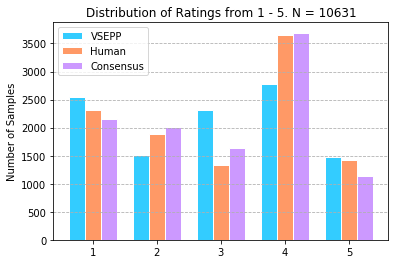

In [69]:
x = ['1', '2', '3', '4', '5']
vsepp = [vsepp_ratings.count(1), vsepp_ratings.count(2), vsepp_ratings.count(3), vsepp_ratings.count(4), vsepp_ratings.count(5)]
human = [human_ratings.count(1), human_ratings.count(2), human_ratings.count(3), human_ratings.count(4), human_ratings.count(5)]
cons = [consensus.count(1), consensus.count(2), consensus.count(3), consensus.count(4), consensus.count(5)]


x_pos = [i for i, _ in enumerate(x)]

bar_width = 0.25

r1 = np.arange(len(vsepp))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, vsepp, color='#33ccff', width=bar_width, edgecolor='white', label='VSEPP')
plt.bar(r2, human, color='#ff9966', width=bar_width, edgecolor='white', label='Human')
plt.bar(r3, cons, color='#cc99ff', width=bar_width, edgecolor='white', label='Consensus')

plt.grid(axis='y', ls='--')
#plt.xlabel("Rating")
plt.ylabel("Number of Samples")
plt.title("Distribution of Ratings from 1 - 5. N = " + str(total))

plt.xticks([r + bar_width for r in range(len(vsepp))], x)
plt.legend()

plt.show()